### Optimization of Asin(2pi/T) + Bcos(2pi/T)<br>
Uses Python Scipy Optimization module and Least Square procedures


In [2]:
%pylab inline
import scipy.optimize as opt

Populating the interactive namespace from numpy and matplotlib


In [35]:
def func1(x, A,B,T):
    return A*np.sin(2*np.pi/T*x) + B*np.cos(2*np.pi/T*x)

def residu1(vec):
    return func1(xs, *vec) - ys

In [39]:
def func2(x, C,p,T):
    return C*np.sin(2*np.pi/T*x+p)

def residu2(vec):
    return func2(xs, *vec) - ys

[0.95386127 2.08974084 4.00619814]
[2.29714347 1.14259198 4.00619811]


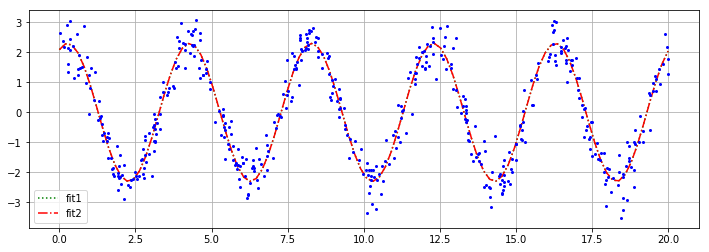

In [52]:
A, B, T = 1.0, 2.0, 4
np.random.seed(2020)

x = np.linspace(0, 5*T, 100)
y = func1(x, A,B,T)

xs = np.random.uniform(min(x), max(x), size=500)
ys = func1(xs, A,B,T)
ys += np.random.normal(0, 0.5, size=len(ys))

# optimize to Asin(2pi/T) + Bcos(2pi/T)
params, _ = opt.leastsq(residu1, [A, B, T])
print (params)
yfit1 = func1(x, *params)

# optimize to Csin(2pi/T + p)
C = np.sqrt(A**2+B**2)
p = np.arctan(B/A)
params, _ = opt.leastsq(residu2, [C, p, T])
print (params)
yfit2 = func2(x, *params)

plt.figure(figsize=(12,4))
plt.plot(x, yfit1, "g:",  label='fit1')
plt.plot(x, yfit2, "r-.", label='fit2')
plt.plot(xs, ys, 'bo', ms=2)
plt.grid();
plt.legend();